In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc,roc_auc_score,roc_curve,plot_roc_curve

from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.impute import SimpleImputer,KNNImputer
from sklearn.compose import make_column_transformer

from scipy.stats import zscore

from sklearn.preprocessing import StandardScaler,PowerTransformer

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
data.shape

(891, 12)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

there are 177 records have null values in Age,687 no. records have null values in Cabin and 2 records have null values in Embarked

In [9]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Removing null values & transformimg object type columns for EDA.

In [10]:
le=LabelEncoder()

In [11]:
data.Sex=le.fit_transform(data.Sex)

In [12]:
data.Sex.unique()

array([1, 0])

In [13]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


    Here in Sex column 1 is for male and 0 for female.

In [14]:
data.Name=le.fit_transform(data.Name)

In [15]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,190,0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,272,0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,373450,8.0500,NaN,S


    Transformed data['Name'] columns to integer.

In [16]:
data.Ticket=le.fit_transform(data.Ticket)

In [17]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,NaN,S
1,2,1,1,190,0,38.0,1,0,596,71.2833,C85,C
2,3,1,3,353,0,26.0,0,0,669,7.9250,NaN,S
3,4,1,1,272,0,35.0,1,0,49,53.1000,C123,S
4,5,0,3,15,1,35.0,0,0,472,8.0500,NaN,S


In [18]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [19]:
len(data['Cabin'].unique())

148

In [20]:
data[["Cabin","Fare"]][data.Cabin.isnull()].iloc[:10]

,Cabin,Fare
0,NaN,7.2500
2,NaN,7.9250
4,NaN,8.0500
5,NaN,8.4583
7,NaN,21.0750
8,NaN,11.1333
9,NaN,30.0708
12,NaN,8.0500
13,NaN,31.2750
14,NaN,7.8542


we can see the cabin is null for those whose fare is less then 31. we can assign new cabin for that.

In [21]:
data.Cabin=le.fit_transform(data.Cabin)

Transformed the Cabin column.

In [22]:
data[["Embarked","Fare"]][data.Embarked.isnull()].iloc[:10]

,Embarked,Fare
61,NaN,80.0
829,NaN,80.0


In [23]:
data[["Embarked","Fare"]][(data.Fare>80) & (data.Fare<82) ].iloc[:10]

,Embarked,Fare
445,S,81.8583


From above two cell we analysed that the null values are for fare 80 . So, we replaced it by 'S'

In [25]:
data.Embarked=data.Embarked.fillna("S")

In [26]:
data.Embarked.isna().sum()

0

In [27]:
    data.Embarked=le.fit_transform(data.Embarked)

In [28]:
knn_imp=KNNImputer(n_neighbors=3)
ages=knn_imp.fit_transform(data[['Fare','Age']])

a=pd.DataFrame(ages)

data.Age=a[1]

 Knn imputer through this it replace the nul values with the value whatever the fare value depend on the age of its 3 neighbors.

In [30]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

No, null values now in dataset.

# EDA

In [31]:
categorical_col=['Embarked',"Parch","SibSp","Sex","Pclass"]
Continous_col=['PassengerId', 'Name', 'Age', 'Ticket' ,'Fare',"Cabin"]

# Scatterplot

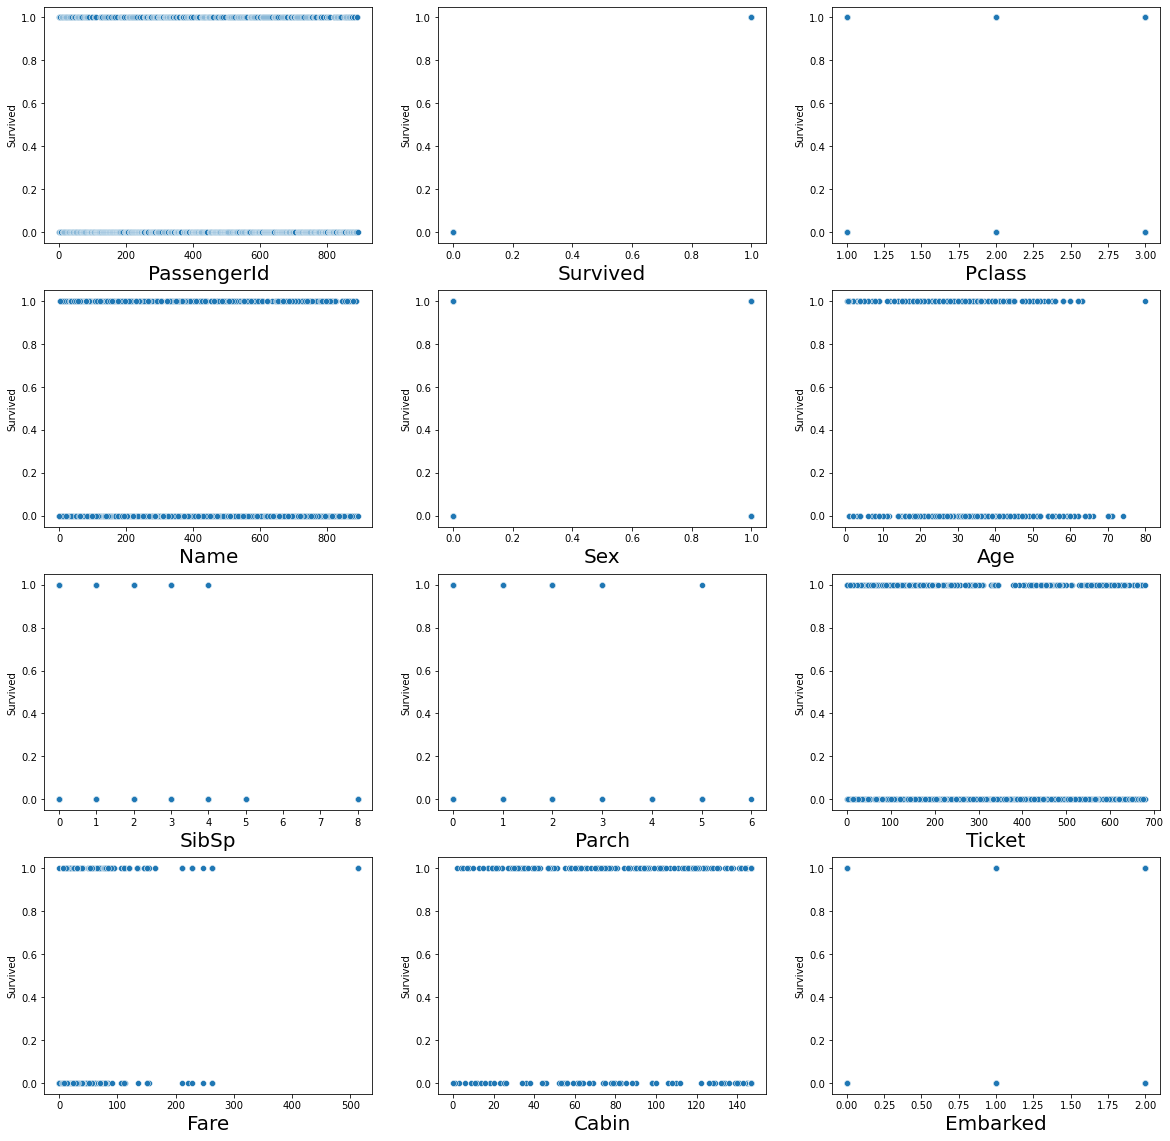

In [32]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.scatterplot(data[col],data.Survived)
        plt.xlabel(col)
        plt.ylabel("Survived")
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Graph 1: Shows relation between the PassengerId and Survived columns through which we analysed that the continous are normally distributed.Doesn't effect to be Survived or not.

Graph 2: Shows relation between Survived and survived.

Graph 3: Shows relation between Pclass & Survived through which we analysed that From every Pclass person got survived or not.

Graph 4: Shows relation between the Name and Survived columns through which we analysed that the continous are normally distributed.Doesn't effect to be Survived or not.

Graph 5:Shows relation between Sex & Survived through which we analysed that every male or female got survived or not.

Graph6:Shows relation between the Age and Survived columns through which we analysed that the continous distributed has seems like outiers in it..

Graph 7:Shows relation between SibSp & Survived through which we analysed that has outliers in it.

Graph 8:Shows relation between Parch & Survived through which we analysed that has 4 no. of parch didn't Survived.

Graph9:Shows relation between the Ticket and Survived columns through which we analysed that the continous are normally distributed.

Graph 10: Shows relation between the Fare and Survived columns through which we analysed that continous 0-100.

Graph 11: Shows relation between the Ticket and Survived columns through which we analysed that are normally distributed. Doesn't effect to be Survived or not.

Graph 12:Shows relation between Embarked & Survived through which we analysed that embarked category of person got survived and not.

# Countplot

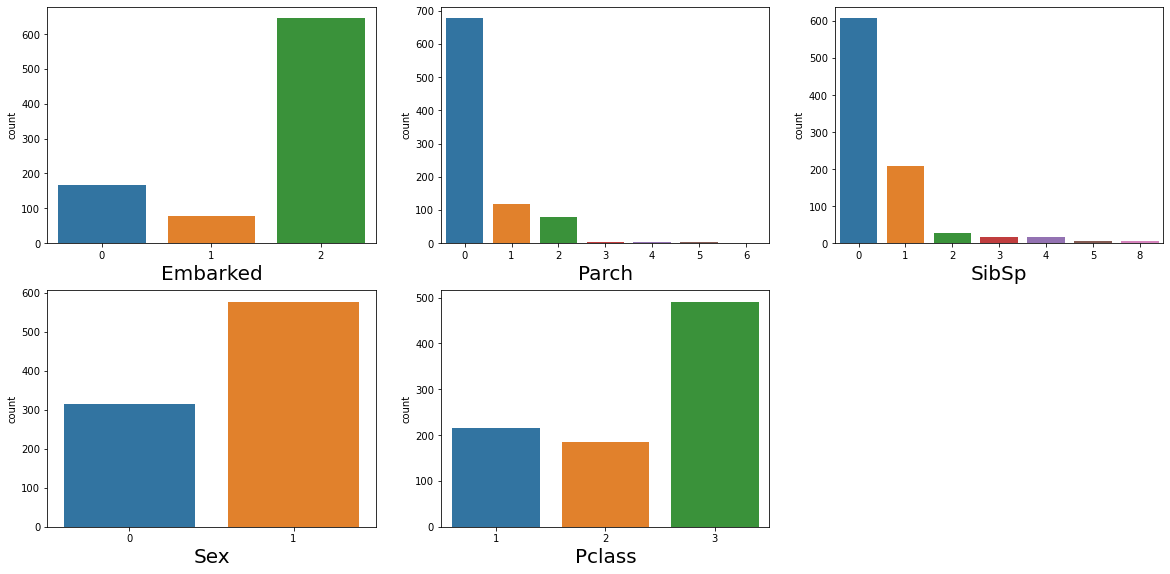

In [33]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data[categorical_col]:
    if plotno<6:
        ax=plt.subplot(4,3,plotno)
        sns.countplot(data[col])
        plt.xlabel(col)
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Graph 1: Shows that the Embarked Column contains maximum 2nd type of embarked.

Graph 2: The person that are maximum travelled on ship has no Parch, And those who have 3,4,5,6 no. of parch with them they travelled very less on that ship.

Graph 3:The person that are maximum travelled on ship has no Siblings, And those who have 2,3,4,5,8 no. of Siblings with them they travelled very less on that ship.

Graph4: shows Male are travelled more on that ship.

Graph 5:shows 3rd class persons are travelled more on that ship.

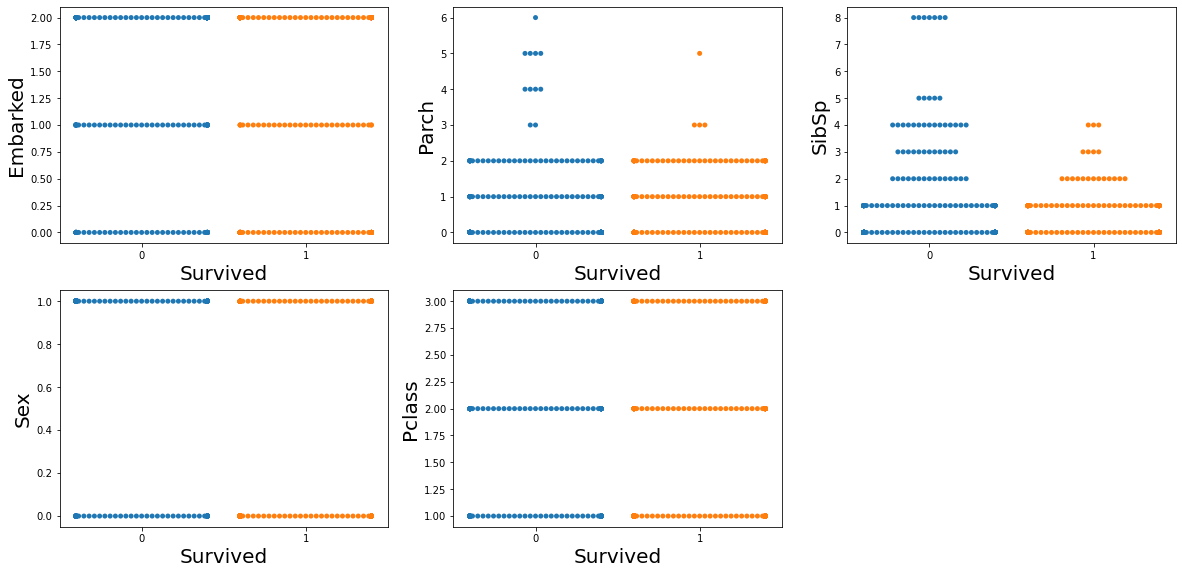

In [35]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data[categorical_col]:
    if plotno<6:
        ax=plt.subplot(4,3,plotno)
        sns.swarmplot(data['Survived'],data[col])
        plt.xlabel("Survived",fontsize=20)
        plt.ylabel(col,fontsize=20)
    plotno+=1
plt.show()

Graph 1: Shows that the Embarked Column of all category got survived/ or not, are continously distributed.

Graph 2: Shows that the Parch Column of all category got survived/ or not, are not continously distributed.

Graph 3:Shows that the Sibsp Column of all category got survived/ or not, are not continously distributed..

Graph4: Shows that the Sex Column of all category got survived/ or not, are continously distributed.

Graph 5:Shows that the Pclass Column of all category got survived/ or not,are continously distributed.

# Distribution plot

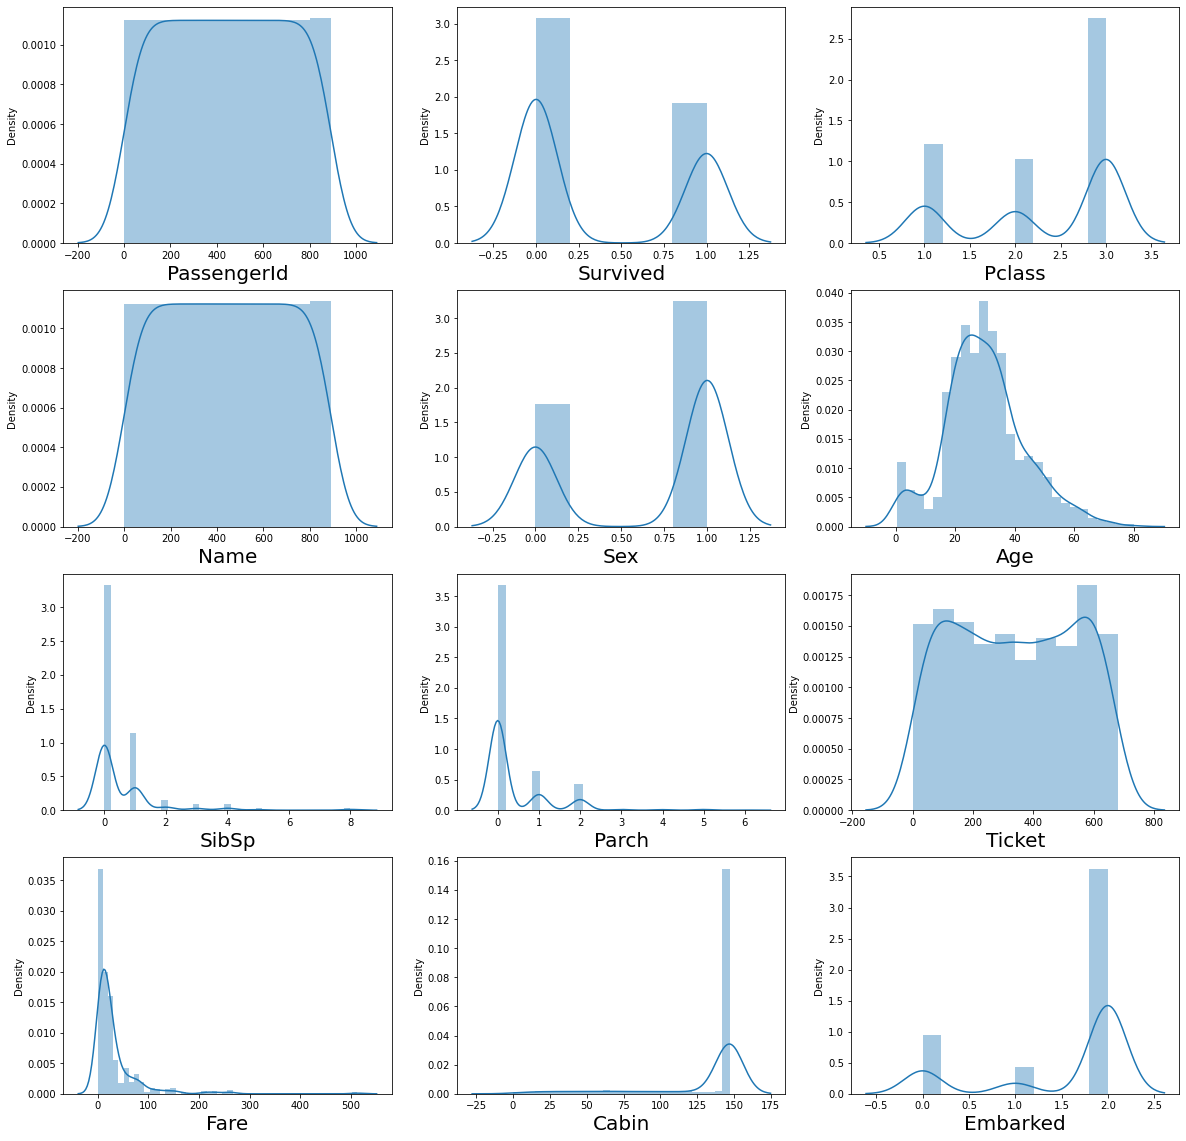

In [36]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Pclass, Sex, SibSp, Parch, Fare, Cabin, Embarked are seems like not distributed.

In [37]:
data.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Name           0.000000
Sex           -0.618921
Age            0.369304
SibSp          3.695352
Parch          2.749117
Ticket         0.000246
Fare           4.787317
Cabin         -2.167313
Embarked      -1.264823
dtype: float64

# Box plot

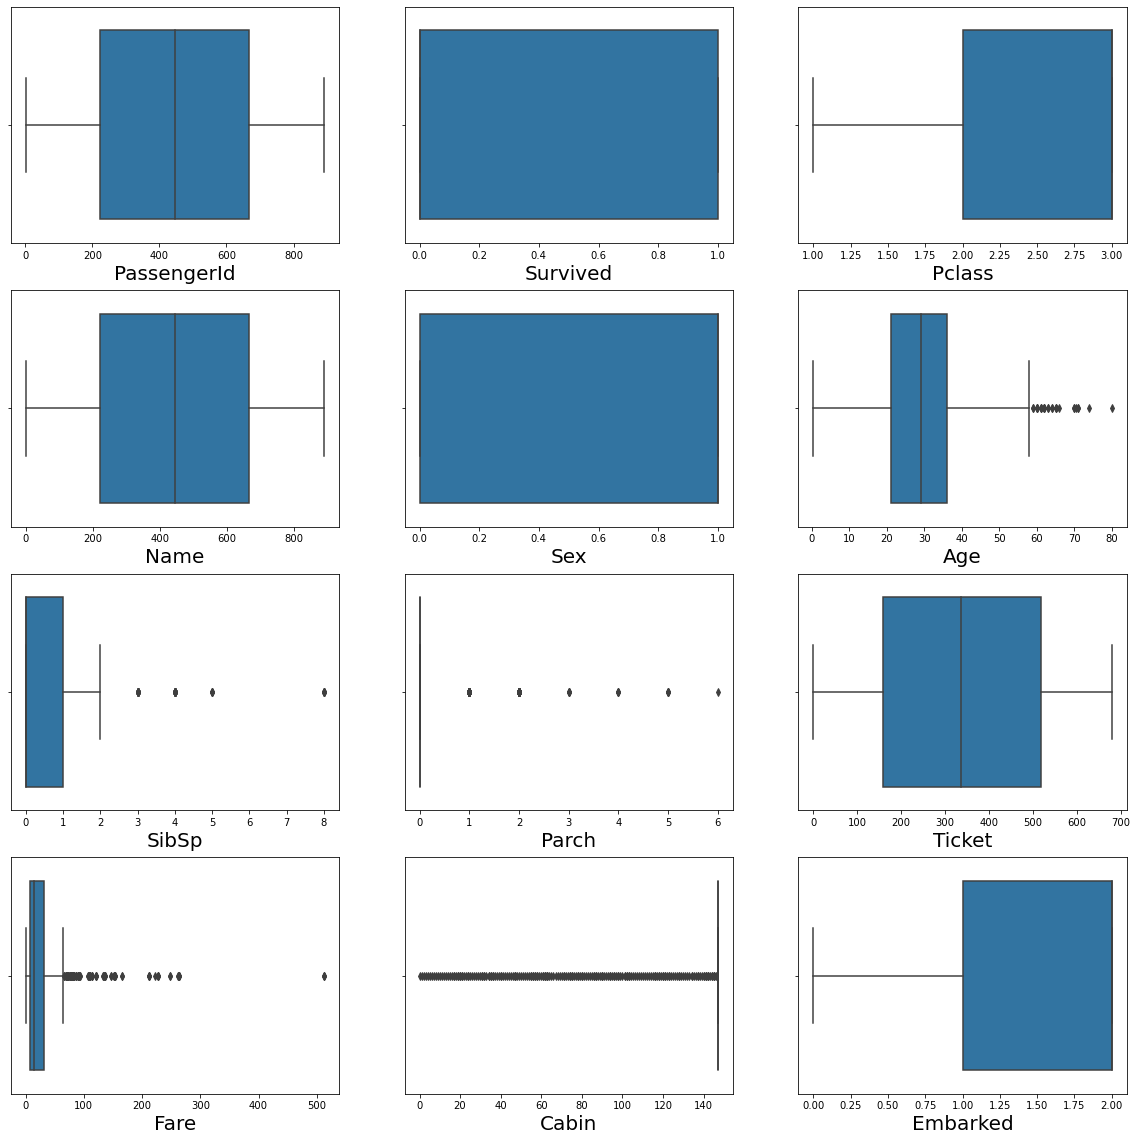

In [38]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()


Age, SibSp,Parch,Fare & Cabin has some outliers while others columns doenn't contains outliers.

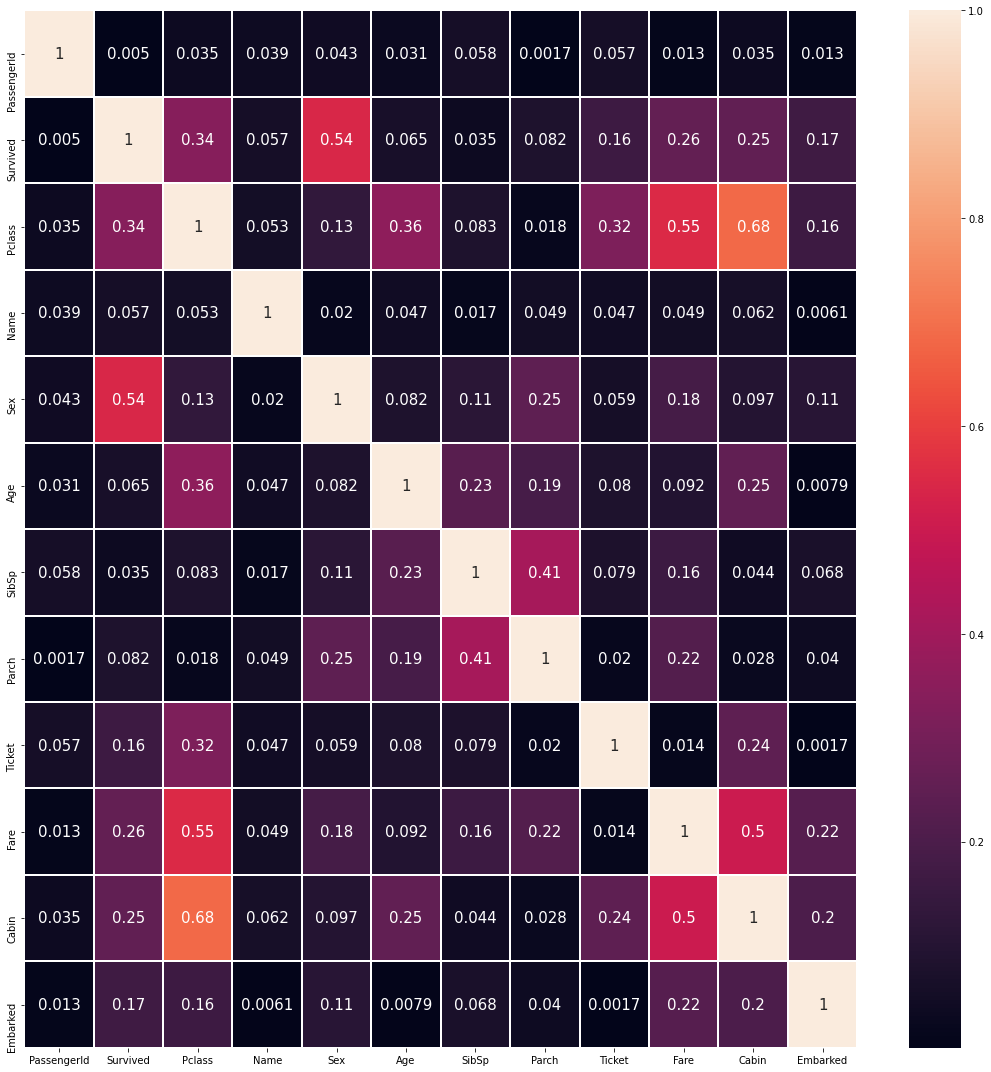

In [39]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().abs(),annot=True,annot_kws={"size":15},linewidths=True)
plt.tight_layout()

from above graph we analysed that : 68% colinearity exists between cabin and Pclass. 55% collinearity exists between PClass and Fare. 50% colinearity exists between fare and Cabin 54% target variable dependent on Sex.

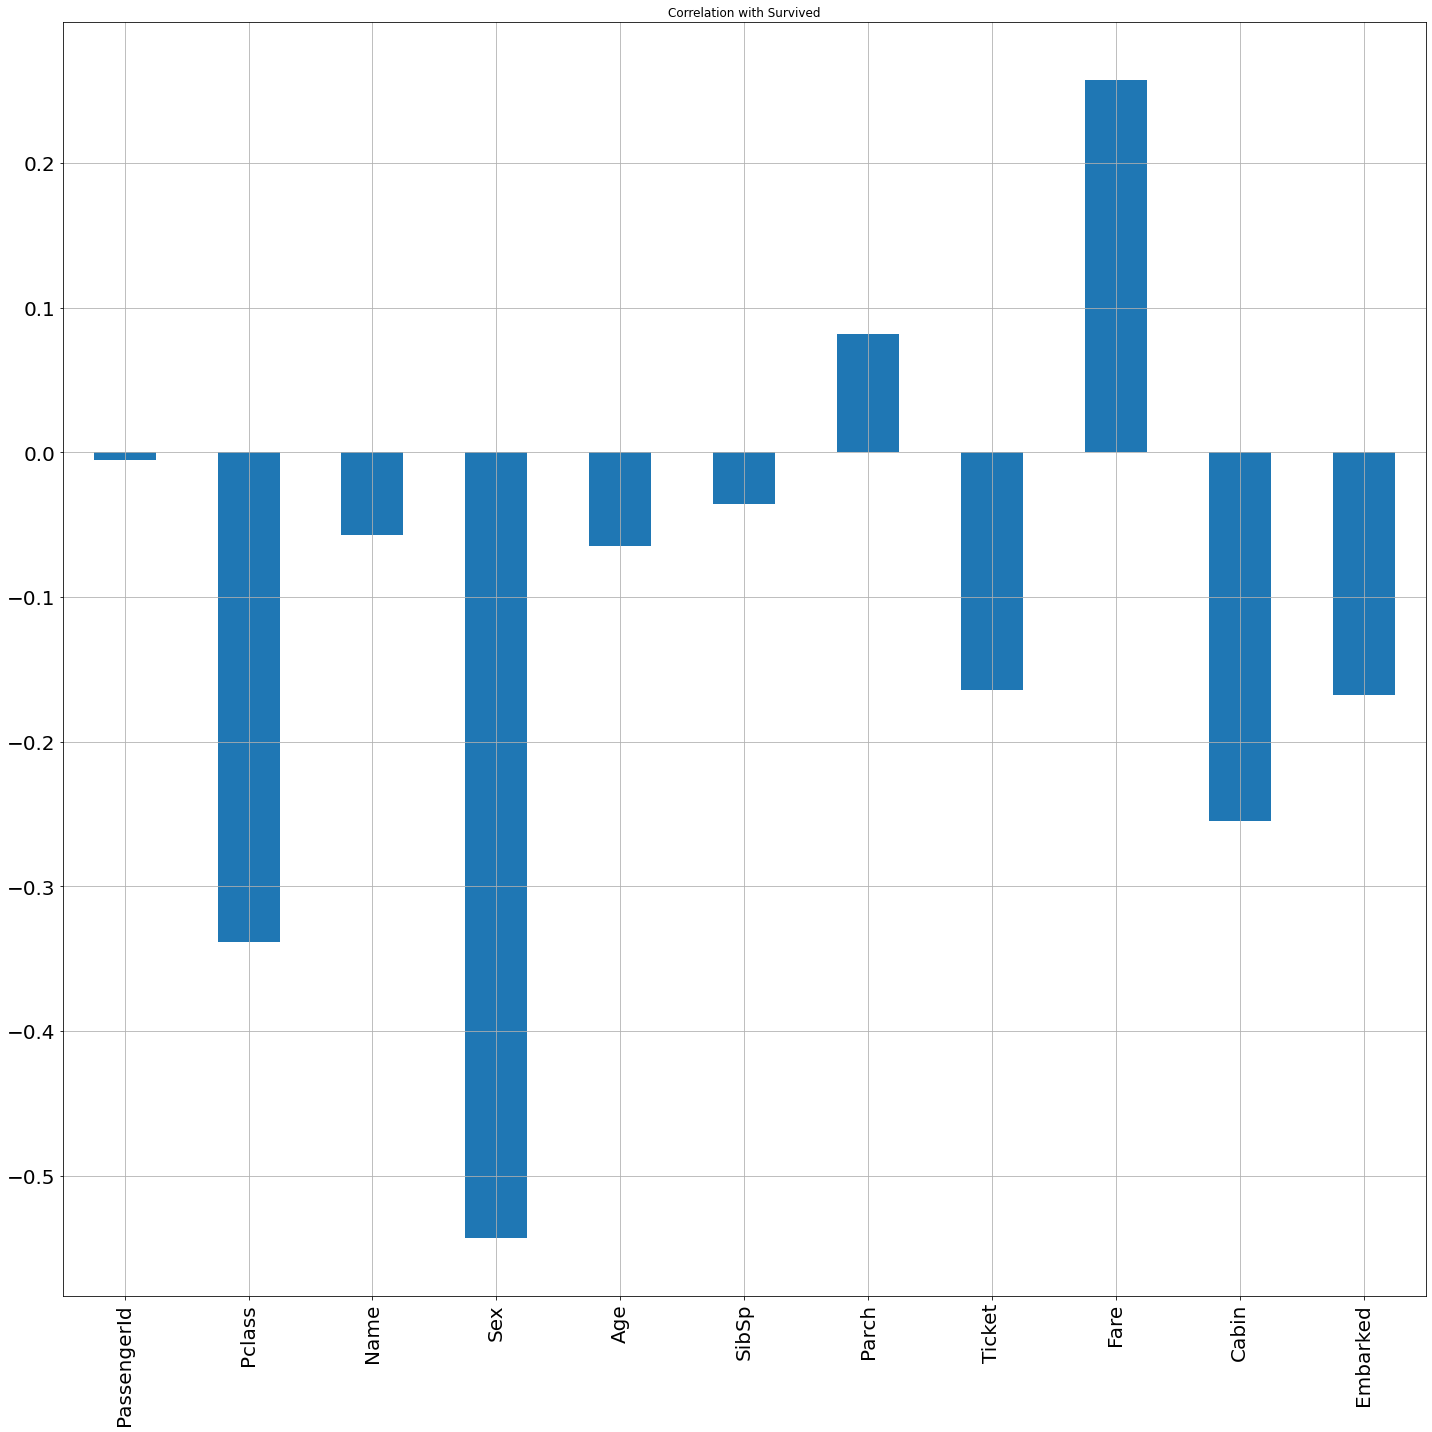

In [40]:
data.drop("Survived",axis=1).corrwith(data.Survived).plot(kind='bar',grid=True,figsize=(20,20),title='Correlation with Survived',fontsize=20)
plt.tight_layout()

Above graph shows the positive and negative relation of features with the target.

In [41]:
data.corrwith(data['Survived'])

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
Name          -0.057343
Sex           -0.543351
Age           -0.064561
SibSp         -0.035322
Parch          0.081629
Ticket        -0.164549
Fare           0.257307
Cabin         -0.254888
Embarked      -0.167675
dtype: float64

PassengerId has least impact on Survival.

In [42]:
data.shape

(891, 12)

# Data Cleaning.

Drop duplicates.

In [43]:
data.drop_duplicates(inplace=True)

In [44]:
data.shape

(891, 12)

No duplicates in the dataset.

Removing Outliers

In [45]:
zscore=zscore(data[['Age', 'SibSp','Parch','Fare' , 'Cabin']])
abs_Zscore=np.abs(zscore)
filtered=(abs_Zscore<3).all(axis=1)
data=data[filtered]

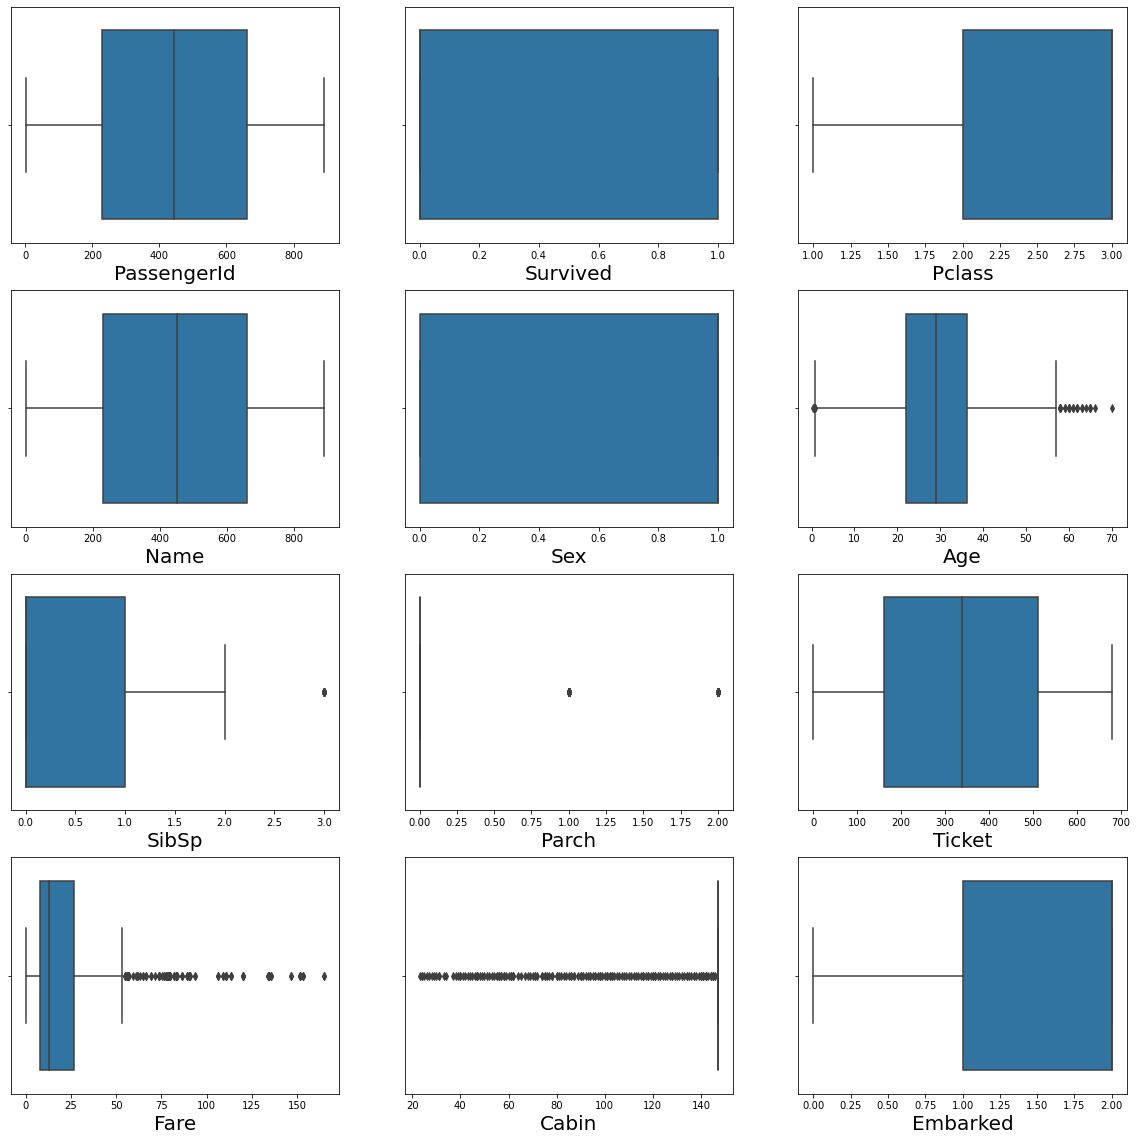

In [46]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.boxplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()


Its seems like still there are some outliers but these are somehow continous now.

In [47]:
data.shape

(799, 12)

In [48]:
data.describe()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000,799.000000
mean,444.993742,0.384230,2.346683,450.073842,0.657071,29.910659,0.352941,0.254068,337.434293,25.246432,135.187735,1.548185
std,254.976644,0.486717,0.807987,253.658451,0.474985,12.633628,0.623747,0.563537,198.177746,29.790324,28.538674,0.781919
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,23.000000,0.000000
25%,227.500000,0.000000,2.000000,231.500000,0.000000,22.000000,0.000000,0.000000,161.500000,7.895800,147.000000,1.000000
50%,444.000000,0.000000,3.000000,451.000000,1.000000,29.000000,0.000000,0.000000,338.000000,13.000000,147.000000,2.000000
75%,661.500000,1.000000,3.000000,659.500000,1.000000,36.166667,1.000000,0.000000,510.500000,26.550000,147.000000,2.000000
max,891.000000,1.000000,3.000000,890.000000,1.000000,70.000000,3.000000,2.000000,679.000000,164.866700,147.000000,2.000000


Using .describe() function we get the statiscal description of our data and seems like are not such outliers that should be removed

# Using Power Transformer. so, that data is less skewed.

In [49]:
features=['Pclass','Sex','SibSp','Parch','Fare','Cabin','Embarked']
scalar=PowerTransformer(method='yeo-johnson')
data[features]=scalar.fit_transform(data[features].values)
data[features].head()

,Pclass,Sex,SibSp,Parch,Fare,Cabin,Embarked
0,0.852616,0.722430,1.540710,-0.484683,-0.827558,0.474889,0.603647
1,-1.514877,-1.384218,1.540710,-0.484683,1.587821,-2.317726,-1.802085
2,0.852616,-1.384218,-0.637389,-0.484683,-0.732259,0.474889,0.603647
3,-1.514877,-1.384218,1.540710,-0.484683,1.289869,-2.353991,0.603647
4,0.852616,0.722430,-0.637389,-0.484683,-0.715469,0.474889,0.603647


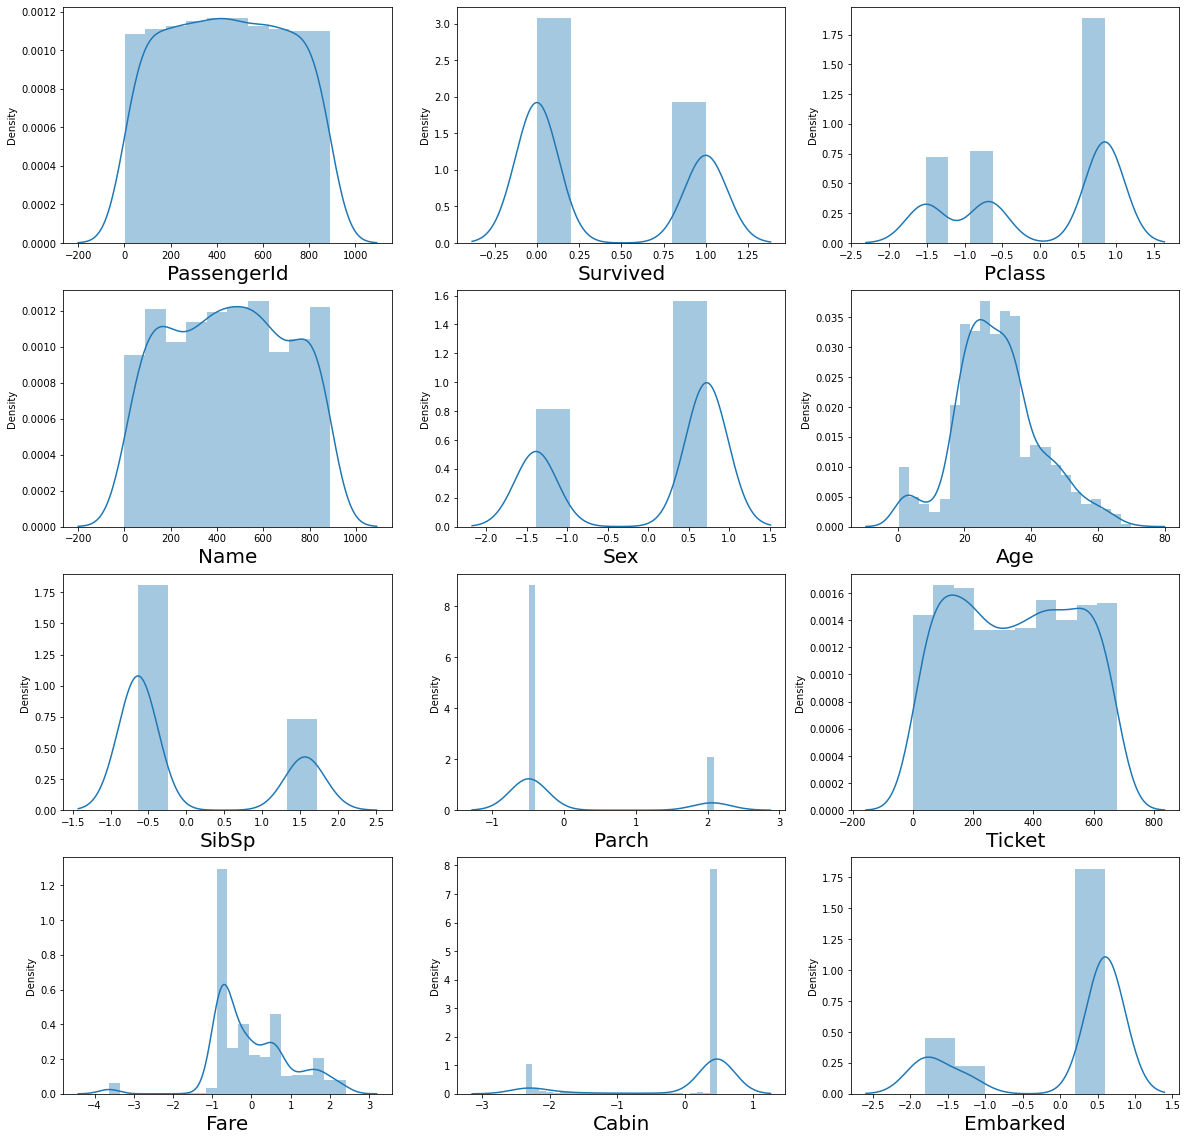

In [50]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=12:
        ax=plt.subplot(4,3,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

Using power transformer now the data is less skewed.

In [51]:
data.skew()


PassengerId    0.006055
Survived       0.476910
Pclass        -0.465111
Name           0.003851
Sex           -0.663033
Age            0.288009
SibSp          0.935685
Parch          1.581627
Ticket         0.018204
Fare          -0.034420
Cabin         -1.737096
Embarked      -1.088385
dtype: float64

zrom above information we can skewness is very low as compared to before using the technique.

# Hypothesis testing & p_value

Ho: No relationship exists between features & target.

H1: reltionship exists between features & target.

In [52]:
import statsmodels.formula.api as smf
lm=smf.ols(formula='Survived~PassengerId+Pclass+Name+Sex+Age+SibSp+Parch+Ticket+Fare+Cabin+Embarked',data=data).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     47.78
Date:                Mon, 03 Jan 2022   Prob (F-statistic):           5.98e-80
Time:                        04:43:48   Log-Likelihood:                -353.55
No. Observations:                 799   AIC:                             731.1
Df Residuals:                     787   BIC:                             787.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.5858      0.056     10.520      0.000       0.477       0.695
PassengerId  1.758e-05   5.31e-05      0.331      0.741   -8.67e-05       0.000
Pclass         -0.0832      0.022     -3.848      0.000      -0.126      -0.041
Name        -2.743e-05   5.34e-05     -0.514      0.608      -0.000    7.74e-05
Sex            -0.2329      0.014    -16.176      0.000      -0.261      -0.205
Age            -0.0053      0.001     -4.489      0.000      -0.008      -0.003
SibSp          -0.0183      0.016     -1.167      0.244      -0.049       0.012
Parch           0.0107      0.015      0.692      0.489      -0.020       0.041
Ticket         -0.0001   7.23e-05     -1.524      0.128      -0.000    3.17e-05
Fare            0.0319      0.022      1.482      0.139      -0.010       0.074
Cabin          -0.0479      0.019     -2.551      0.011      -0.085      -0.011
Embarked       -0.0250      0.014     -1.810      0.071      -0.052       0.002
==============================================================================
Omnibus:                       31.376   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               34.074
Skew:                           0.485   Prob(JB):                     3.99e-08
Kurtosis:                       3.288   Cond. No.                     3.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
PassengerId,Name,Embarked,Fare,Ticket,SibSp,Parch are the column that rejects to accepts the nll hypothesis because their pValues are grater then 0.05.



# Droping Columns.

In [53]:
data.drop(columns=['PassengerId','Name','Embarked','Fare','Ticket','SibSp','Parch'],inplace=True,axis=1)

In [54]:
data.shape

(799, 5)

# Data loss

In [55]:
data_loss=(891-799)/891
data_loss*100

10.32547699214366

We lost total 10.32% of data that are 92 no. of records.

# model deployment

In [56]:
X=data.drop(['Survived'],axis=1)
Y=data.Survived

splitting data into fetures & labels.

Here X is our features & Y is our label.

In [57]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

Standarized the features

In [59]:
max_accuracy=0
for i in range(1,150):
    X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    accuracy=accuracy_score(Y_test,Y_pred)*100
    if accuracy>max_accuracy:
        max_accuracy=accuracy
        rs=i
print(f"The highest accuracy is {max_accuracy} at random state {rs}")
    

The highest accuracy is 88.125 at random state 36


In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(X_scaled,Y,test_size=0.2,random_state=rs)

we split the training dataset & test dataset at random state rs i.e. 36 where we get the high accuracy

# Checking for imbalancing.

<AxesSubplot:xlabel='Survived', ylabel='count'>

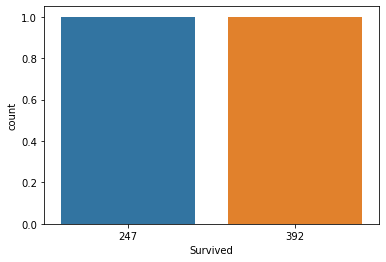

In [61]:
sns.countplot(Y_train.value_counts())

Above graph shows that the data is balanced.

In [62]:
Linear=LogisticRegression()
DecisionTree=DecisionTreeClassifier()
knn=KNeighborsClassifier()
RandomForest=RandomForestClassifier()
AdaBoost=AdaBoostClassifier()
Bagging=BaggingClassifier()

In [63]:
algo=[Linear,DecisionTree,RandomForest,knn,AdaBoost,Bagging]
acc_models={}
for model in algo:
    model.fit(X_train,Y_train)
    Y_pred=model.predict(X_test)
    print("-"*60)
    acc_models[model]=round(accuracy_score(Y_test,Y_pred)*100,1)
    print(f"The model {model} has:: \n\t Accuracy :: {round(accuracy_score(Y_test,Y_pred)*100,1)}%")
    print(f" Confusion Matrix of th model is ::\n{confusion_matrix(Y_test,Y_pred)}")
    print(f" Classification Report of th model  is :: \n{classification_report(Y_test,Y_pred)}")
    print("-"*60)
    print("\n")

------------------------------------------------------------
The model LogisticRegression() has:: 
	 Accuracy :: 88.1%
 Confusion Matrix of th model is ::
[[89 11]
 [ 8 52]]
 Classification Report of th model  is :: 
              precision    recall  f1-score   support

           0       0.92      0.89      0.90       100
           1       0.83      0.87      0.85        60

    accuracy                           0.88       160
   macro avg       0.87      0.88      0.87       160
weighted avg       0.88      0.88      0.88       160

------------------------------------------------------------


------------------------------------------------------------
The model DecisionTreeClassifier() has:: 
	 Accuracy :: 80.6%
 Confusion Matrix of th model is ::
[[83 17]
 [14 46]]
 Classification Report of th model  is :: 
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       100
           1       0.73      0.77      0.75        60

    accu

In [64]:
acc_models

{LogisticRegression(): 88.1,
 DecisionTreeClassifier(): 80.6,
 RandomForestClassifier(): 81.2,
 KNeighborsClassifier(): 85.0,
 AdaBoostClassifier(): 83.8,
 BaggingClassifier(): 82.5}

In [65]:
CVmodel={}

for model in algo:
    CVscore_={}
    print(f"\n{model}")
    print("-"*25)
    print("\n")
    for i in range(2,10):
        cvS=cross_val_score(model,X_scaled,Y,cv=i)
        CVscore_[i]=cvS.mean()
        print(f"Mean CV Score of model {model}:: {cvS.mean()} at k-fold::{i}\n")
    CVdata=pd.DataFrame(CVscore_,index=[""])
    CVmodel[str(model)]=CVdata.max(axis=1).tolist()


LogisticRegression()
-------------------------


Mean CV Score of model LogisticRegression():: 0.7947431077694236 at k-fold::2

Mean CV Score of model LogisticRegression():: 0.8085100391428007 at k-fold::3

Mean CV Score of model LogisticRegression():: 0.8034924623115578 at k-fold::4

Mean CV Score of model LogisticRegression():: 0.8072327044025158 at k-fold::5

Mean CV Score of model LogisticRegression():: 0.8047637751094153 at k-fold::6

Mean CV Score of model LogisticRegression():: 0.8060041407867494 at k-fold::7

Mean CV Score of model LogisticRegression():: 0.8022474747474748 at k-fold::8

Mean CV Score of model LogisticRegression():: 0.8047043468391782 at k-fold::9


DecisionTreeClassifier()
-------------------------


Mean CV Score of model DecisionTreeClassifier():: 0.7646992481203008 at k-fold::2

Mean CV Score of model DecisionTreeClassifier():: 0.8060272403856082 at k-fold::3

Mean CV Score of model DecisionTreeClassifier():: 0.805998743718593 at k-fold::4

Mean CV Score of

In [66]:
CVmodel

{'LogisticRegression()': [0.8085100391428007],
 'DecisionTreeClassifier()': [0.8123012755770022],
 'RandomForestClassifier()': [0.8210460608449964],
 'KNeighborsClassifier()': [0.8185489949748743],
 'AdaBoostClassifier()': [0.8147955974842767],
 'BaggingClassifier()': [0.8085512288183144]}

 we can see the maximun CV score of each model

In [67]:
acc_value=list(acc_models.values ( ))

m=list(CVmodel.keys())

print("The least difference between the r2-score and CV score of each model is::\n")
for i in range(6):
    print(f"{m[i]}::{round(np.abs(CVmodel[m[i]][0]*100-acc_value[i]),2)}")

The least difference between the r2-score and CV score of each model is::

LogisticRegression()::7.25
DecisionTreeClassifier()::0.63
RandomForestClassifier()::0.9
KNeighborsClassifier()::3.15
AdaBoostClassifier()::2.32
BaggingClassifier()::1.64


model DecisionTreeClassifier we get the least value i.e. the difference between the r2-score and cvScore of this model is 0.1. So, DecisionTreeClassifier is the best model to use for this problem.

# Plotting Roc_Auc_Curve

In [68]:
algo

[LogisticRegression(),
 DecisionTreeClassifier(),
 RandomForestClassifier(),
 KNeighborsClassifier(),
 AdaBoostClassifier(),
 BaggingClassifier()]

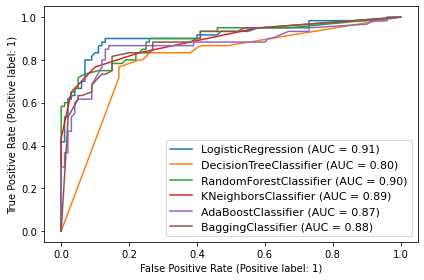

In [70]:
dis=plot_roc_curve(Linear,X_test,Y_test)
plot_roc_curve(DecisionTree,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(RandomForest,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(knn,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(AdaBoost,X_test,Y_test,ax=dis.ax_)
plot_roc_curve(Bagging,X_test,Y_test,ax=dis.ax_)
plt.legend(prop={'size':11},loc='lower right')
plt.tight_layout()

# Hyper Parameter Tuning

In [71]:
grid_param={
            'criterion':['entropy','gini'],
            'max_depth':range(7,15),
            'min_samples_leaf':range(1,4),
            'min_samples_split':range(2,10)
}

In [72]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [73]:
grid=GridSearchCV(estimator=DecisionTree,cv=6,param_grid=grid_param,n_jobs=-1)

In [74]:
grid.fit(X_train,Y_train)

GridSearchCV(cv=6, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(7, 15),
                         'min_samples_leaf': range(1, 4),
                         'min_samples_split': range(2, 10)})

In [75]:
grid.best_estimator_

DecisionTreeClassifier(max_depth=12, min_samples_leaf=3, min_samples_split=8)

In [76]:
DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3,
                       min_samples_split=8)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3,
                       min_samples_split=8)

In [77]:
DecisionTree=DecisionTreeClassifier(criterion='entropy',max_depth=12, min_samples_leaf=3, min_samples_split=8)
DecisionTree.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=12, min_samples_leaf=3,
                       min_samples_split=8)

In [78]:
    Y_pred=DecisionTree.predict(X_test)

In [79]:
print(f"The model DecisionTree has:: \n\t Accuracy :: {round(accuracy_score(Y_test,Y_pred)*100,1)}%")
print(f" Confusion Matrix of th model is ::\n{confusion_matrix(Y_test,Y_pred)}")
print(f" Classification Report of th model  is :: \n{classification_report(Y_test,Y_pred)}")

The model DecisionTree has:: 
	 Accuracy :: 83.1%
 Confusion Matrix of th model is ::
[[85 15]
 [12 48]]
 Classification Report of th model  is :: 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86       100
           1       0.76      0.80      0.78        60

    accuracy                           0.83       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.83      0.83      0.83       160



Our accuracy has been increased now.

# Saving model

In [84]:
ada={}
import joblib
joblib.dump(ada,'Titanic_model.obj')

['Titanic_model.obj']